### Exploring Census Data
##### George Karam
In this week's assignment, I will be exploring data related to educational attainment (by census tract) to understand the relationship--should there be one--between education and bike infrastructure. Are educated (and this higher income) areas more averse to bike lanes? Futher, since educational attainment is one (of many) factors that influence gentrification, an education profile for the city could be helpful for future analysis. <br><br>
**Commands Used:** <br>
import .. as .. <br>
.read_csv <br>
.shape <br>
.head() <br>
.sample() <br>
.set_option('display.max_rows', None) <br>
.set_option('display.max_columns', None) <br>
.info(verbose=True, null_counts=True) <br>
.read_csv('..', dtype= {..:str}) <br>
.isna().all() <br>
.to_list() <br>
.dropna(axis=.., how="all") <br>
.columns <br>
.plot <br>
.set_title <br>
.add_basemap <br>

#### Importing Our Data

In [1]:
## importing pandas for data exploration
import pandas as pd

In [4]:
## loading our data
df = pd.read_csv('Educ_Attain.csv')

In [5]:
## checking the extent of our data (# of rows and cols)
df.shape

(2346, 70)

In [6]:
## checking the first 5 rows
df.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
0,6037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,...,120,63,60,15.17,24.05,37.40,15.59,3.85,2.02,1.92
1,6037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,...,257,0,105,6.10,27.06,34.35,19.02,9.56,0.00,3.91
2,6037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,...,207,34,44,16.06,23.62,37.10,16.46,4.91,0.81,1.04
3,6037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3874,NaN,...,170,20,27,19.92,27.36,29.25,15.27,6.42,0.76,1.02
4,6037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3875,NaN,...,342,109,49,10.24,26.11,32.42,15.91,10.48,3.34,1.50


#### Default Settings Override

In [9]:
## pd.set_option('display.max_row/columns', None) will override the default 20 (first 10 and last 10) columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
## checking if the override worked
df.sample()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
1812,6037555103,14000US06037555103,Census Tract 5551.03,"Census Tract 5551.03, Los Angeles County, Cali...",ca,140,0,ACSSF,5683,NaN,NaN,NaN,NaN,6,37,NaN,NaN,NaN,555103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3495,483,713,1092,953,192,53,9,13.82,20.4,31.24,27.27,5.49,1.52,0.26


#### Data Types

In [11]:
## checking our data types. we must add the arguments 'verbose=True' and 'null_counts=True' because of the number of columns
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   int64  
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   int64  
 14  Geo_COUNTY         2346 non-null   int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

/tmp/ipykernel_1638/89769205.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


#### Converting FIPS from Int to Str (The pesky leading zero...)

In [12]:
## data_variable = pd(panda).read_csv('NAME OF DATA', dtype= {'INT1':str,'INT2':str,'INT3': str})
df = pd.read_csv(
    '../data/Educ_Attain.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY':str,
    }
)

FileNotFoundError: [Errno 2] No such file or directory: '../data/Educ_Attain.csv'

In [13]:
## checking if our FIPS, State, and County values are strings (object) and not integers (int64)
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   int64  
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   int64  
 14  Geo_COUNTY         2346 non-null   int64  
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

/tmp/ipykernel_1638/1657909274.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


#### Removing Empty Columns

In [14]:
## checking if we have empty columns; df.isna().all() finds all empty columns
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

In [15]:
## .dropna() will remove any rows (axis=0) or columns (axis=1)
## how="all" to remove a row/columns that is entirely empty
## we also redefine our data (df) when we run the code
df = df.dropna(axis=1, how="all")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   int64  
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_STATE          2346 non-null   int64  
 10  Geo_COUNTY         2346 non-null   int64  
 11  Geo_TRACT          2346 non-null   int64  
 12  SE_A12001_001      2346 non-null   int64  
 13  SE_A12001_002      2346 non-null   int64  
 14  SE_A12001_003      2346 non-null   int64  
 15  SE_A12001_004      2346 non-null   int64  
 16  SE_A12001_005      2346 

#### Dropping additional columns (by name)

In [17]:
# list of additional columns to drop
col_to_drop = ['Geo_GEOID','Geo_STUSAB','Geo_SUMLEV','Geo_GEOCOMP','Geo_FILEID','Geo_LOGRECNO']

In [18]:
# redfine data and drop columns; print
df = df.drop(col_to_drop,axis=1)
df.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,SE_A12001_001,SE_A12001_002,SE_A12001_003,SE_A12001_004,SE_A12001_005,SE_A12001_006,SE_A12001_007,SE_A12001_008,PCT_SE_A12001_002,PCT_SE_A12001_003,PCT_SE_A12001_004,PCT_SE_A12001_005,PCT_SE_A12001_006,PCT_SE_A12001_007,PCT_SE_A12001_008
0,6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,3118,473,750,1166,486,120,63,60,15.17,24.05,37.40,15.59,3.85,2.02,1.92
1,6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,2687,164,727,923,511,257,0,105,6.10,27.06,34.35,19.02,9.56,0.00,3.91
2,6037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,4216,677,996,1564,694,207,34,44,16.06,23.62,37.10,16.46,4.91,0.81,1.04
3,6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,2646,527,724,774,404,170,20,27,19.92,27.36,29.25,15.27,6.42,0.76,1.02
4,6037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,3263,334,852,1058,519,342,109,49,10.24,26.11,32.42,15.91,10.48,3.34,1.50


#### Renaming columns

In [19]:
# df.columns.to_list() also works
columns = list(df) 
columns

['Geo_FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_A12001_001',
 'SE_A12001_002',
 'SE_A12001_003',
 'SE_A12001_004',
 'SE_A12001_005',
 'SE_A12001_006',
 'SE_A12001_007',
 'SE_A12001_008',
 'PCT_SE_A12001_002',
 'PCT_SE_A12001_003',
 'PCT_SE_A12001_004',
 'PCT_SE_A12001_005',
 'PCT_SE_A12001_006',
 'PCT_SE_A12001_007',
 'PCT_SE_A12001_008']

In [20]:
## renaming columns; copy above and use Data Dictionary to fill with correct names
df.columns = ['FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'TotalPop',
 'Less_Than_High School',
 'High_School_Graduate',
 'Some_college',
 'Bachelors_degree',
 'Masters_degree',
 'Professional_school_degree',
 'Doctorate_degree',
 'PCT_Less_Than_High School',
 'PCT_High_School_Graduate',
 'PCT_Some_college',
 'PCT_Bachelors_degree',
 'PCT_Masters_degree',
 'PCT_Professional_school_degree',
 'PCT_Doctorate_degree']

In [21]:
df.head()

,FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,TotalPop,Less_Than_High School,High_School_Graduate,Some_college,Bachelors_degree,Masters_degree,Professional_school_degree,Doctorate_degree,PCT_Less_Than_High School,PCT_High_School_Graduate,PCT_Some_college,PCT_Bachelors_degree,PCT_Masters_degree,PCT_Professional_school_degree,PCT_Doctorate_degree
0,6037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",6,37,101110,3118,473,750,1166,486,120,63,60,15.17,24.05,37.40,15.59,3.85,2.02,1.92
1,6037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",6,37,101122,2687,164,727,923,511,257,0,105,6.10,27.06,34.35,19.02,9.56,0.00,3.91
2,6037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",6,37,101210,4216,677,996,1564,694,207,34,44,16.06,23.62,37.10,16.46,4.91,0.81,1.04
3,6037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",6,37,101220,2646,527,724,774,404,170,20,27,19.92,27.36,29.25,15.27,6.42,0.76,1.02
4,6037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",6,37,101300,3263,334,852,1058,519,342,109,49,10.24,26.11,32.42,15.91,10.48,3.34,1.50


#### Mapping Our Data

In [22]:
## importing geopandas for mapping
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [23]:
# LA County census tracts (2010) data pulled from LA City website
tracts=gpd.read_file('../data/Census_Tracts_2010.geojson')
tracts.head()

DriverError: ../data/Census_Tracts_2010.geojson: No such file or directory

In [24]:
# checking what's in our tract data
tracts.info(verbose=True, null_counts=True)

NameError: name 'tracts' is not defined

In [25]:
# subsetting our data
tracts = tracts[['GEOID10','geometry']]
tracts.head()

NameError: name 'tracts' is not defined

In [26]:
# renaming our columns
tracts.columns = ['FIPS','geometry']

NameError: name 'tracts' is not defined

In [27]:
# doublecheck
tracts.head()

NameError: name 'tracts' is not defined

In [28]:
# plotting our census tracts
tracts.plot(figsize=(12,10))

NameError: name 'tracts' is not defined

#### Merging our datasets

In [29]:
# create a new dataframe based on the join (i.e., let's add geometry data to our census data)
tracts_educ=tracts.merge(df,on="FIPS")

NameError: name 'tracts' is not defined

In [30]:
tracts_educ.head()

NameError: name 'tracts_educ' is not defined

#### FINALLY, MAPS!

In [31]:
# add necessary libraries for data mapping
# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [32]:
tracts_educ.plot(figsize=(12,10),
                 column='PCT_Bachelors_degree',
                 legend=True, 
                 scheme='NaturalBreaks')

NameError: name 'tracts_educ' is not defined

In [33]:
tracts_educ[tracts_educ.PCT_Bachelors_degree > 30].plot(figsize=(12,10))

NameError: name 'tracts_educ' is not defined

In [34]:
# reproject to Web Mercator
gdf_web_mercator = tracts_educ.to_crs(epsg=3857)

NameError: name 'tracts_educ' is not defined

NameError: name 'gdf_web_mercator' is not defined

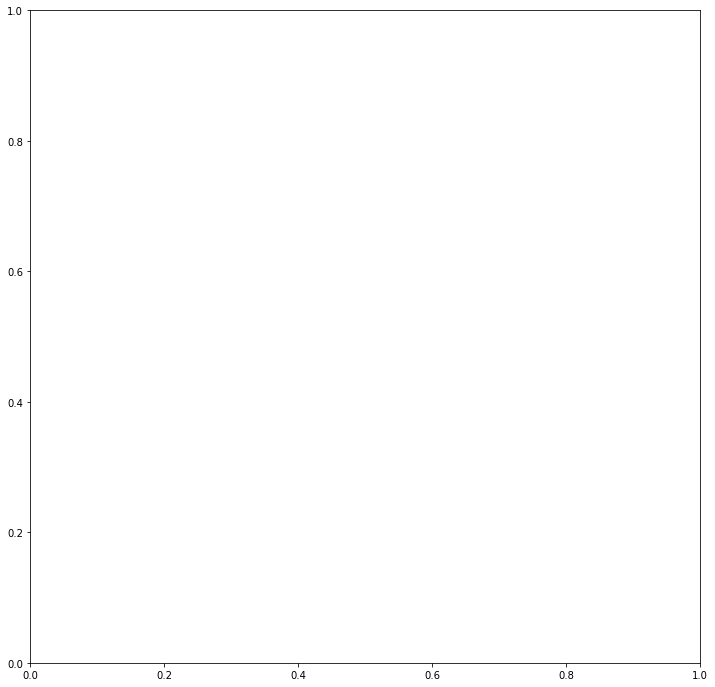

In [35]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(12, 12))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['PCT_Bachelors_degree'] > 35].plot(
                                                               ax=ax, 
                                                               color="red",
                                                               alpha=0.8
)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts where more than 35% of adult population have a Bachelors Degree',fontsize=24,pad=20)

# add a basemap
ctx.add_basemap(ax)

In [42]:
# list of tracts shown in map above
tracts_educ[tracts_educ.PCT_Bachelors_degree > 35]

,FIPS,geometry,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,Geo_TRACT,TotalPop,Less_Than_High School,High_School_Graduate,Some_college,Bachelors_degree,Masters_degree,Professional_school_degree,Doctorate_degree,PCT_Less_Than_High School,PCT_High_School_Graduate,PCT_Some_college,PCT_Bachelors_degree,PCT_Masters_degree,PCT_Professional_school_degree,PCT_Doctorate_degree
10,06037576001,"MULTIPOLYGON (((-118.20542 33.76952, -118.2046...",Census Tract 5760.01,"Census Tract 5760.01, Los Angeles County, Cali...",06,037,576001,4683,136,436,1388,1641,713,216,153,2.90,9.31,29.64,35.04,15.23,4.61,3.27
16,06037670328,"POLYGON ((-118.40371 33.78136, -118.40369 33.7...",Census Tract 6703.28,"Census Tract 6703.28, Los Angeles County, Cali...",06,037,670328,3412,14,201,606,1483,611,348,149,0.41,5.89,17.76,43.46,17.91,10.20,4.37
17,06037670326,"POLYGON ((-118.38480 33.79109, -118.38477 33.7...",Census Tract 6703.26,"Census Tract 6703.26, Los Angeles County, Cali...",06,037,670326,2733,27,206,378,1013,536,421,152,0.99,7.54,13.83,37.07,19.61,15.40,5.56
18,06037670324,"POLYGON ((-118.39054 33.80422, -118.38891 33.8...",Census Tract 6703.24,"Census Tract 6703.24, Los Angeles County, Cali...",06,037,670324,3654,29,75,634,1728,696,383,109,0.79,2.05,17.35,47.29,19.05,10.48,2.98
19,06037651402,"POLYGON ((-118.35101 33.80503, -118.35002 33.8...",Census Tract 6514.02,"Census Tract 6514.02, Los Angeles County, Cali...",06,037,651402,4384,200,454,1134,1631,721,145,99,4.56,10.36,25.87,37.20,16.45,3.31,2.26
44,06037670413,"POLYGON ((-118.39105 33.77904, -118.39109 33.7...",Census Tract 6704.13,"Census Tract 6704.13, Los Angeles County, Cali...",06,037,670413,3334,82,185,632,1311,758,205,161,2.46,5.55,18.96,39.32,22.74,6.15,4.83
46,06037574901,"POLYGON ((-118.12532 33.79603, -118.12209 33.7...",Census Tract 5749.01,"Census Tract 5749.01, Los Angeles County, Cali...",06,037,574901,2574,98,210,743,977,394,81,71,3.81,8.16,28.87,37.96,15.31,3.15,2.76
47,06037577100,"POLYGON ((-118.15242 33.77534, -118.15133 33.7...",Census Tract 5771,"Census Tract 5771, Los Angeles County, California",06,037,577100,5403,327,659,1456,1917,798,183,63,6.05,12.20,26.95,35.48,14.77,3.39,1.17
52,06037670403,"POLYGON ((-118.36350 33.77860, -118.36352 33.7...",Census Tract 6704.03,"Census Tract 6704.03, Los Angeles County, Cali...",06,037,670403,1956,29,155,327,752,469,101,123,1.48,7.92,16.72,38.45,23.98,5.16,6.29
97,06037670405,"POLYGON ((-118.37829 33.77671, -118.37851 33.7...",Census Tract 6704.05,"Census Tract 6704.05, Los Angeles County, Cali...",06,037,670405,2170,22,106,528,761,463,163,127,1.01,4.88,24.33,35.07,21.34,7.51,5.85
